In [3]:
#import libraries
import numpy as np #for various numerical operations
import pandas as pd #for processing of data
import plotly.express as px #for data visualization
import matplotlib.pyplot as plt #for data visualization|

#set options
pd.set_option('display.max_columns', None)

In [96]:
#Read the dataset
customer_data = pd.read_csv("telco.csv")

#description and overview of the dataset
def data_overview(df, message):
    print(f'{message}:\n')
    print('Number of Rows: ', df.shape[0])
    print("\nNumber of Columns: ", df.shape[1])
    print('\nColumn Names in the dataset:')
    print(df.columns.tolist())
    print('\nUnique values:')
    print(df.nunique())

data_overview(customer_data, 'Overview of the dataset')

Overview of the dataset:

Number of Rows:  7043

Number of Columns:  50

Column Names in the dataset:
['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason']

Unique values:
Customer ID         

  Churn Label  count
0          No   5174
1         Yes   1869


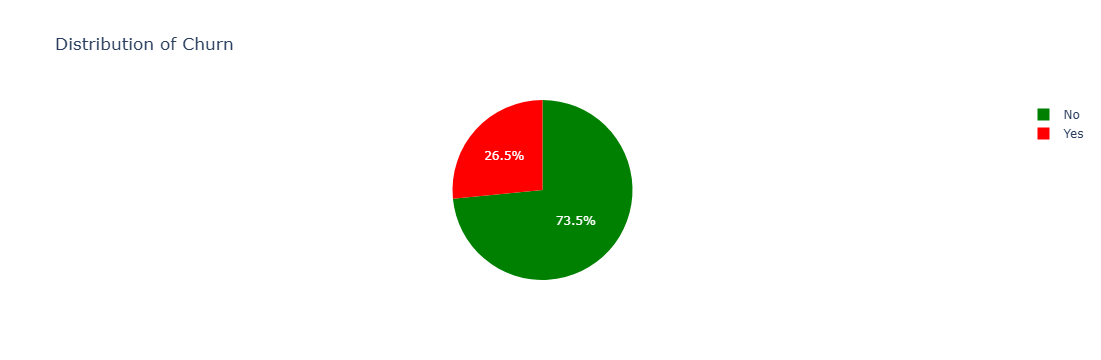

In [98]:
target_col = customer_data['Churn Label'].value_counts().to_frame().reset_index()
print(target_col)
target_col.columns = ['Churn Label', 'Count']

fig = px.pie(
    target_col,
    values='Count',
    names='Churn Label',
    color_discrete_sequence=['green', 'red'],
    title='Distribution of Churn'
)

fig.show()

In [100]:
#Defining bar chart function
def bar(feature, df=customer_data ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn Label']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn Label', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



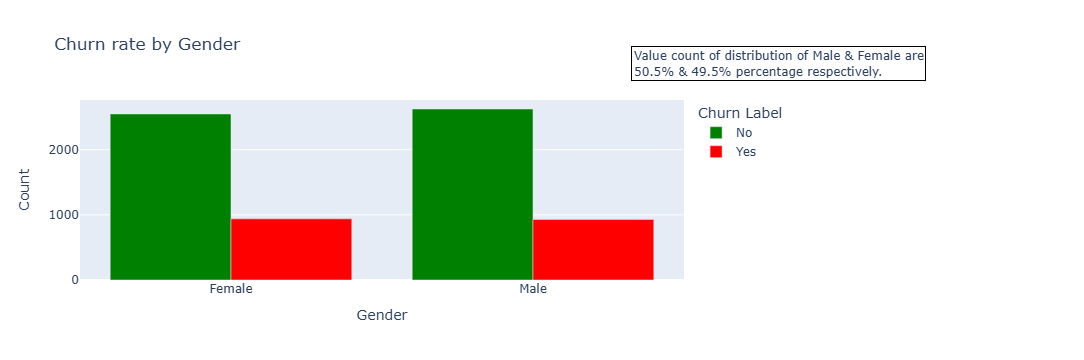

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



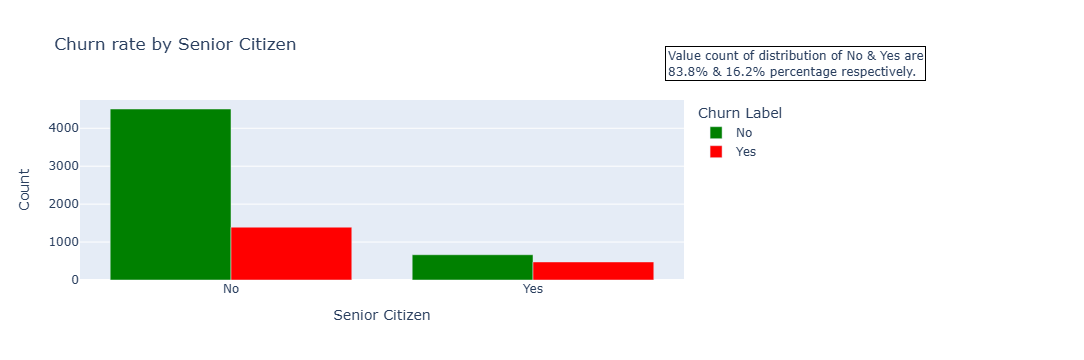

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



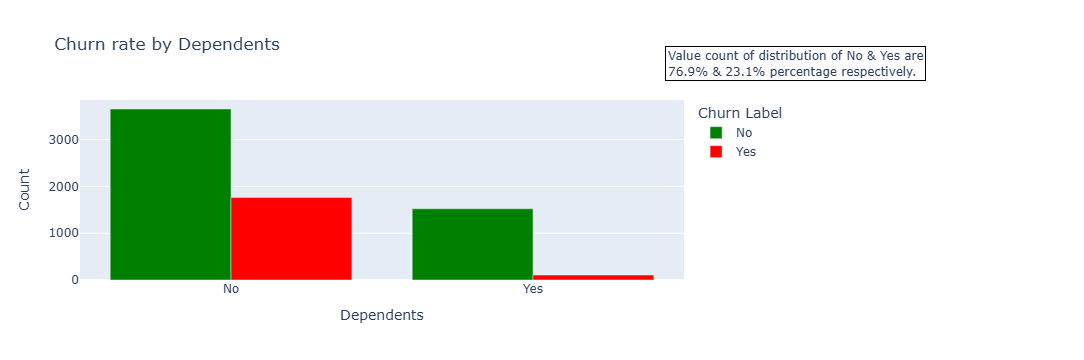

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



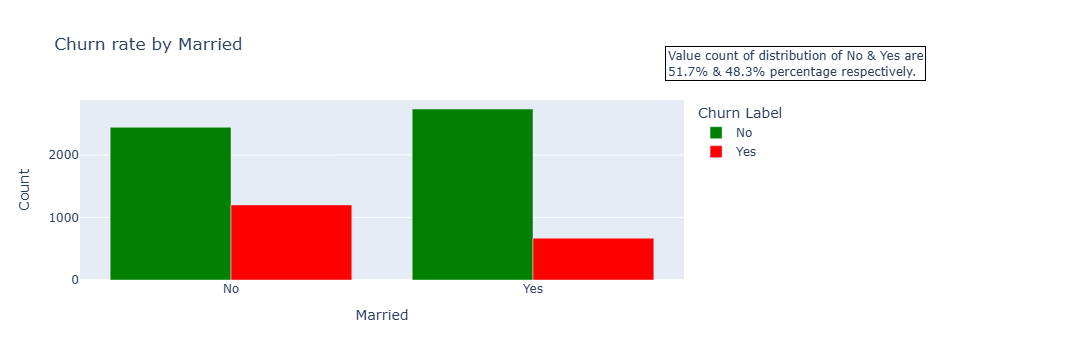

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



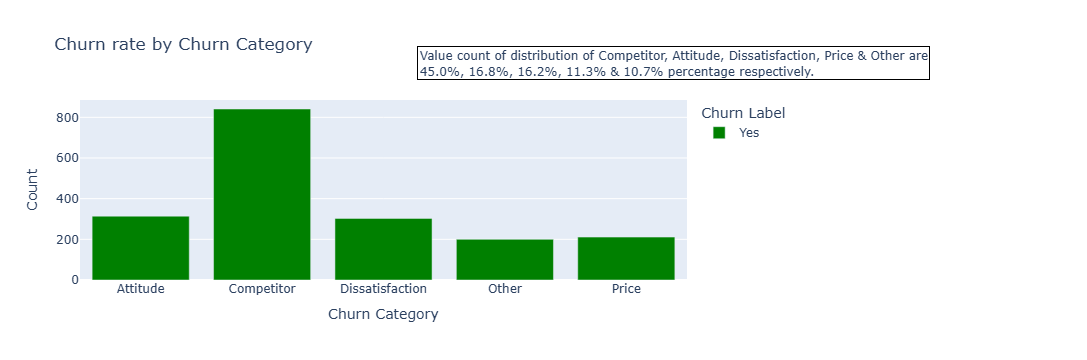

In [102]:
#Gender feature plot
bar('Gender')

#SeniorCitizen feature plot 
bar('Senior Citizen')

#Dependents feature plot
bar('Dependents')

#married feature plot
bar('Married') 

#Churn Category Plot
bar('Churn Category')

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



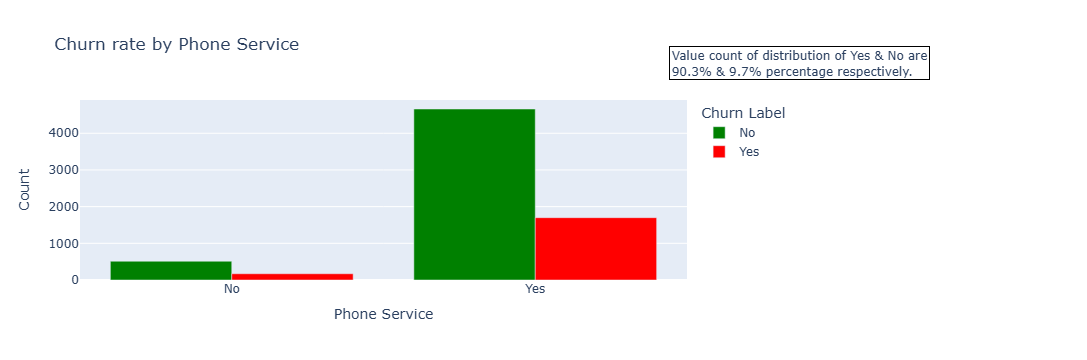

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



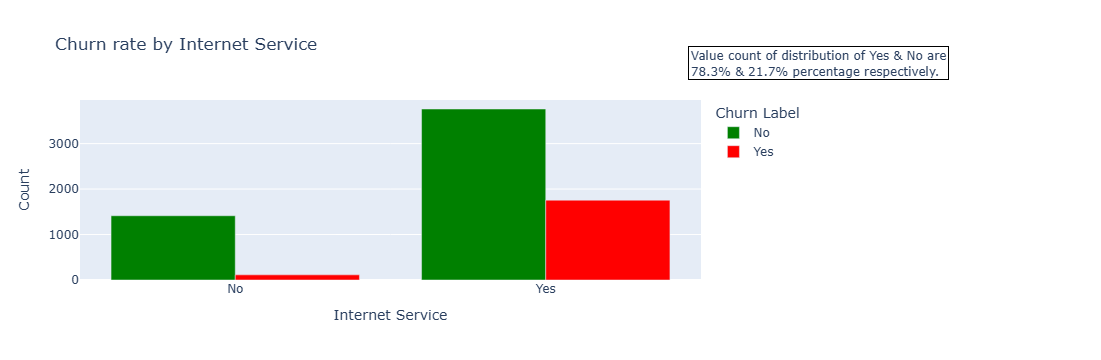

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



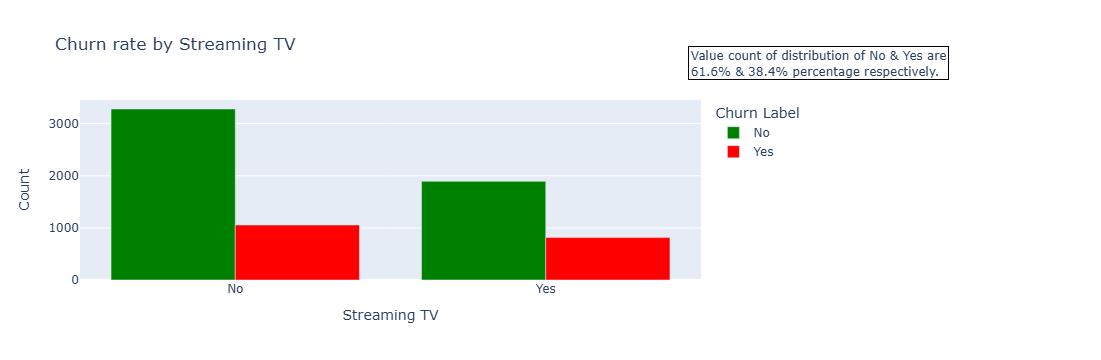

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



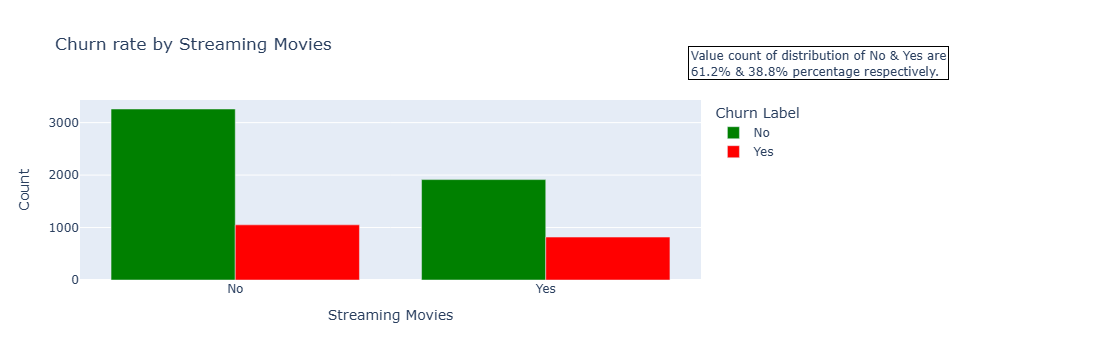

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\pcslg\AppData\Local\Temp\ipykernel_15120\3752291236.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



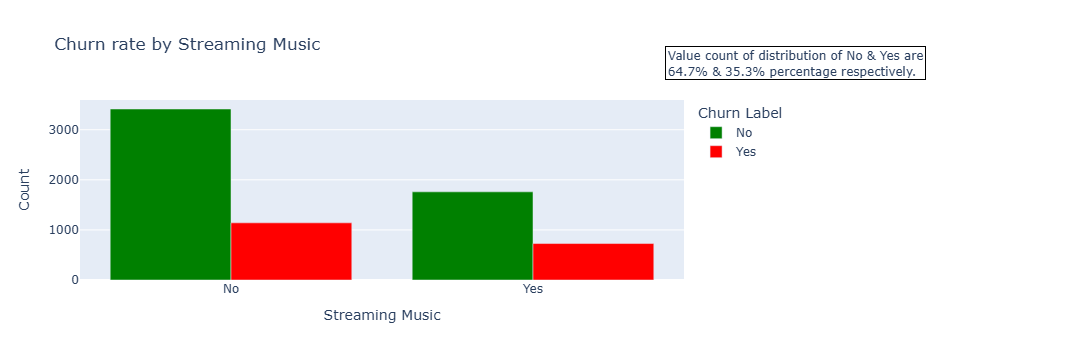

In [103]:
bar('Phone Service')
bar('Internet Service')
bar('Streaming TV')
bar('Streaming Movies')
bar('Streaming Music')

In [104]:
customer_data.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Country                               object
State                                 object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Population                             int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple L

In [108]:
# Defining the histogram plotting function
def hist(feature):
    group_df = customer_data.groupby([feature, 'Churn Label']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn Label', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

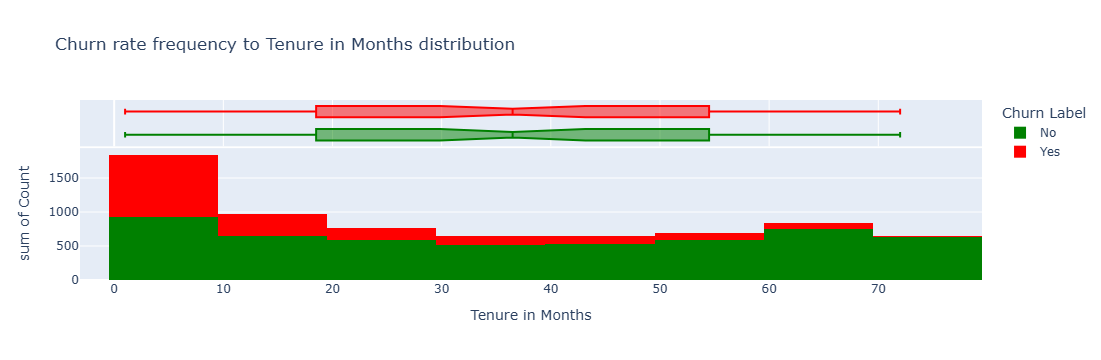

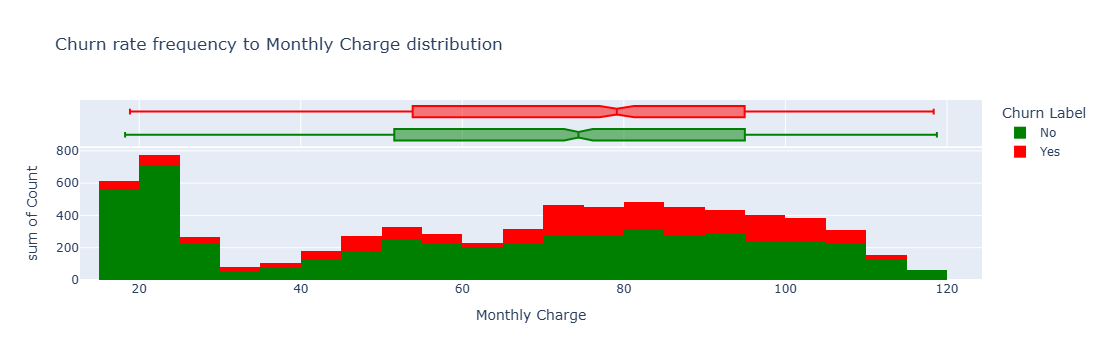

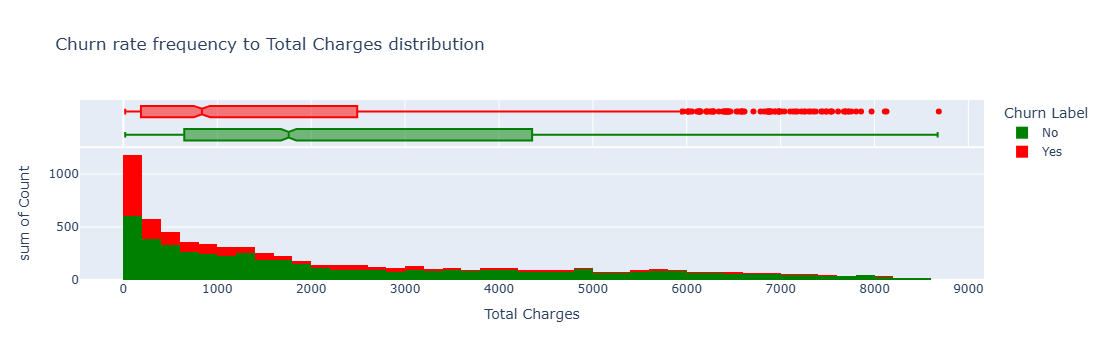

In [110]:
hist('Tenure in Months')
hist('Monthly Charge')
hist('Total Charges')

In [111]:
# The customerID column isnt useful as the feature is used for identification of customers. 
customer_data.drop(["Customer ID"],axis=1,inplace = True)
customer_data.drop(["City"],axis=1,inplace = True)
customer_data.drop(["Churn Category"],axis=1,inplace = True)
customer_data.drop(["Churn Reason"],axis=1,inplace = True)
customer_data.drop(["Customer Status"],axis=1,inplace = True)
customer_data.drop(["Latitude"],axis=1,inplace = True)
customer_data.drop(["Longitude"],axis=1,inplace = True)
customer_data.drop(["Offer"],axis=1,inplace = True)

# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
customer_data['Churn Label'] = customer_data[['Churn Label']].apply(binary_map)

# Encoding gender category
customer_data['Gender'] = customer_data['Gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['Senior Citizen', 'Married', 'Dependents', 'Phone Service', 'Paperless Billing']
customer_data[binary_list] = customer_data[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
customer_data = pd.get_dummies(customer_data, drop_first=True)

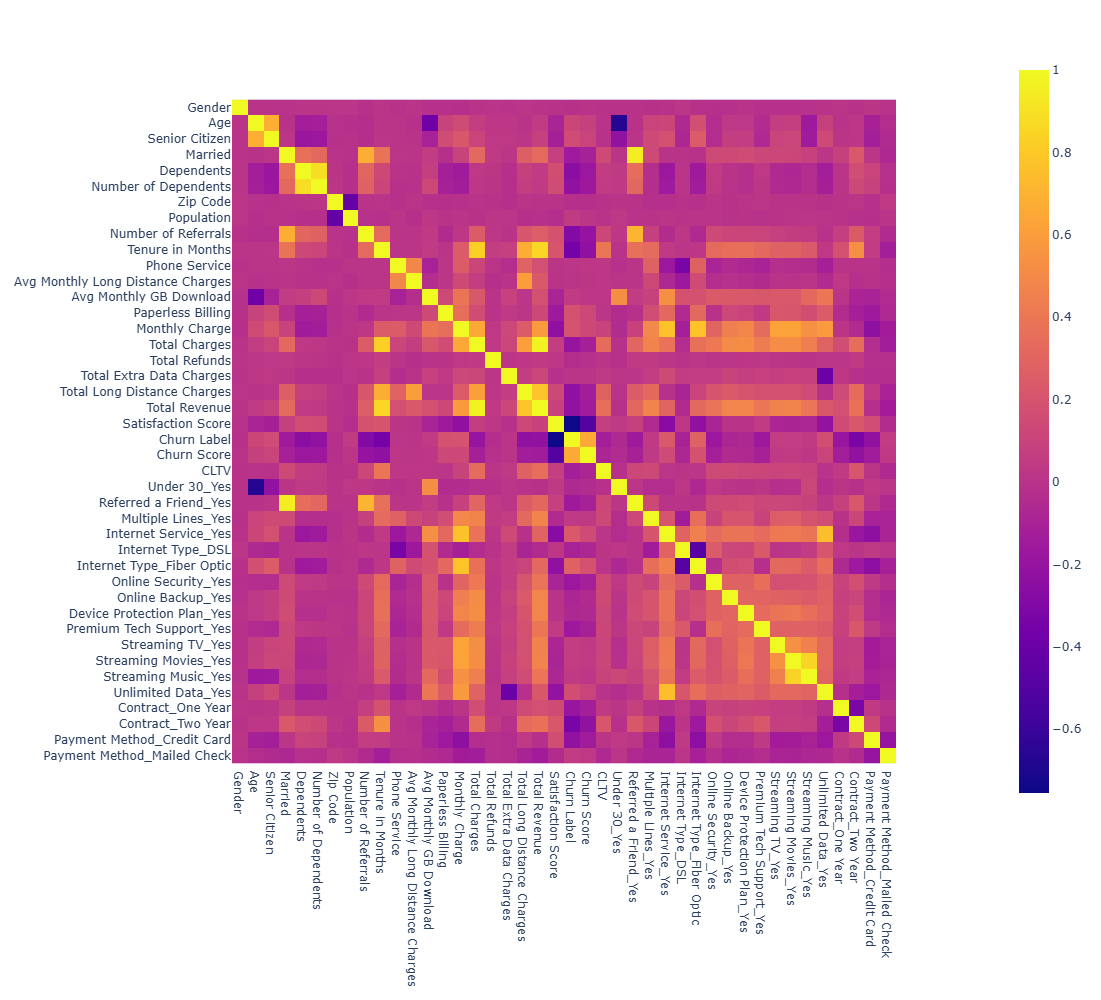

In [114]:
# Checking the correlation between features
corr = customer_data.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [116]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in customer_data.columns]

#Effect the change to the dataframe column names
customer_data.columns = all_columns

In [118]:
#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['Customer ID', 'Churn Label']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn_Label ~ {glm_columns}', data=customer_data, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Churn_Label   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7001
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7682e-09
Date:                Mon, 28 Oct 2024   Deviance:                   5.5298e-09
Time:                        00:16:55   Pearson chi2:                 2.76e-09
No. Iterations:                    27   Pseudo R-squ. (CS):             0.6856
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

C:\Users\pcslg\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\pcslg\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\pcslg\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\pcslg\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Users\pcslg\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

C:\Us

In [5]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_df = pd.read_csv("telco.csv")
data_df['Tenure in Months'] = sc.fit_transform(data_df[['Tenure in Months']])
data_df['Monthly Charge'] = sc.fit_transform(data_df[['Monthly Charge']])
data_df['Total Charges'] = sc.fit_transform(data_df[['Total Charges']])

# The customerID column isnt useful as the feature is used for identification of customers. 
data_df.drop(["Customer ID"],axis=1,inplace = True)


#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
data_df['Churn Label'] = data_df[['Churn Label']].apply(binary_map)

# Encoding gender category
data_df['Gender'] = data_df['Gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['Senior Citizen', 'Married', 'Dependents', 'Phone Service', 'Paperless Billing']
data_df[binary_list] = data_df[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
data_df = pd.get_dummies(data_df, drop_first=True)



In [7]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [11]:
#Split data into train and test sets
from sklearn.model_selection import train_test_split
y = data_df['Churn Label']
X = data_df.drop('Churn Label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [23]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')
print('\n')

### SVC
svc_model = modeling(SVC, 'SVC Classification')
print('\n')

#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")
print('\n')

#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")
print('\n')

#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

C:\Users\pcslg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
accuracy:  0.898248935163275
precision:  0.8022181146025879
recall:  0.8007380073800738
f1_score:  0.8982181456126835


SVC Classification
accuracy:  0.7434926644581165
precision:  0.0
recall:  0.0
f1_score:  0.6341080216415315




C:\Users\pcslg\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classification
accuracy:  0.9985802176999526
precision:  1.0
recall:  0.9944649446494465
f1_score:  0.9985789247659235


Decision Tree Classification
accuracy:  1.0
precision:  1.0
recall:  1.0
f1_score:  1.0


Naive Bayes Classification
accuracy:  0.9607193563653573
precision:  0.9165154264972777
recall:  0.9317343173431735
f1_score:  0.9608246593594464
